In [92]:
import os
import pathlib
import random
import sys

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [93]:
os.getcwd()
INSPECTION_PATH = pathlib.Path(os.getcwd()).parent / "country-backend"
sys.path.append(str(INSPECTION_PATH.absolute()))

In [94]:
from country.model.predict import model
from country.model.predict import preprocess, prediction, predict_image

In [95]:
from country.explainer.new_lime_ import explain_image
from PIL import Image
from skimage import img_as_float

import time

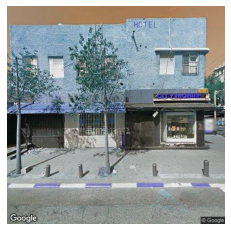

ValueError: in user code:

    File "C:\Users\Matze\anaconda3\envs\XaiEnv\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Matze\anaconda3\envs\XaiEnv\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Matze\anaconda3\envs\XaiEnv\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Matze\anaconda3\envs\XaiEnv\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\Matze\anaconda3\envs\XaiEnv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Matze\anaconda3\envs\XaiEnv\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [96]:
img = np.array(cv2.imread("C:\\Users\\Matze\\Documents\\University\\Work\\BeispielBilder\\from_xaidemo.de\\i1.jpg"))
plt.imshow(img)
plt.axis("off")
plt.show()
img = preprocess(img)
img = np.squeeze(img)
predict_image(img)

In [97]:
image_explanation = explain_image(img = img, seg_method = "felzenszwalb", seg_settings = {}, num_of_samples = 200, samples_p = 0.5,
                  model_ = model, threshold = 0.3, volume = 45, colour =  "red")

gradient=[
np.ones((1,1)) * [173, 38, 38] / 255*1.0,
np.ones((1,1)) * [173, 38, 38] / 255*0.8,
np.ones((1,1)) * [173, 38, 38] / 255*0.6,
np.ones((1,1)) * [173, 38, 38] / 255*0.4,
np.ones((1,1)) * [173, 38, 38] / 255*0.2,
np.ones((1,1)) * [173, 38, 38] / 255*0.0,
]

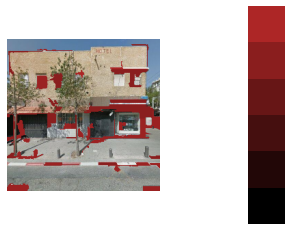

In [98]:
f, axarr = plt.subplots(1,2)
axarr[0].axis("off")
axarr[1].axis("off")
axarr[0].imshow(image_explanation)
axarr[1].imshow(gradient)